# CALIDAD DE DATOS

<h1>Archivo : 8_2_historico_velocidad_internet_provincias.csv</h1> 

Importamos librerias

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

Elegimos ignorar los warnings

In [4]:
# Ignorar todos los warnings
warnings.filterwarnings("ignore")


Cargamos el archivo csv

In [5]:
# cargamos el archivo
df = pd.read_csv(r'..\CSV\8_2_historico_velocidad_internet_provincias.csv', sep=',', encoding='ANSI')

Hacemos un primer analisis de los datos

In [6]:
# vemos las primeras lineas para identificar columna y datos
df.head(10)

,AÃ±o,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592
5,2022,4,CÃ³rdoba,10.877
6,2022,4,Corrientes,9.472
7,2022,4,Entre RÃ­os,8.747
8,2022,4,Formosa,7.203
9,2022,4,Jujuy,3.932


In [7]:
# obtenemos la info del datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AÃ±o                    864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


<h2>Normalizacion de los datos</h2>

Normalizamos el nombre de las columnas

In [8]:
# Convertir los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

In [9]:
# Reemplazar los espacios por guiones bajos en los nombres de las columnas
df.columns = df.columns.str.replace(' ', '_')

In [10]:
df = df.rename(columns={'aã±o':'año'})

Verificamos la existencia de registros duplicados

In [11]:
# verificamos la existencia de registros duplicados
duplicados_df = df[df.duplicated()]
duplicados_df

,año,trimestre,provincia,mbps_(media_de_bajada)


Verificamos la existencia de valores nulos

In [12]:
# Buscar los valores NaN en la columna 'mi_columna'
valores_nulos = df.isnull().sum()
# Contar valores nulos por columna
valores_nulos

año                       0
trimestre                 0
provincia                 0
mbps_(media_de_bajada)    0
dtype: int64

Vemos los valores de la columna ya que en la misma se encuentran valores con errores

In [13]:
df['provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'CÃ³rdoba', 'Corrientes', 'Entre RÃ\xados', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'NeuquÃ©n',
       'RÃ\xado Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'TucumÃ¡n'],
      dtype=object)

Hacemos un reemplazo de valores

In [14]:
# Reemplazar múltiples valores en la columna 'columna_a_modificar'
reemplazos = {'CÃ³rdoba': 'Cordoba', 'Entre RÃ\xados': 'Entre Rios', 'NeuquÃ©n': 'Neuquen', 'RÃ\xado Negro': 'Rio Negro', 'TucumÃ¡n':'Tucuman' }
df['provincia'] = df['provincia'].replace(reemplazos)

Verificamos el cambio

In [15]:
df['provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Cordoba', 'Corrientes', 'Entre Rios', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen',
       'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman'],
      dtype=object)

Creamos un campo 'fecha' para observar mejor la distribucion de los valores en el grafico

In [16]:
# Crear una nueva columna "fecha" combinando las columnas "dia", "trimestre" y "año"
df['fecha'] = pd.to_datetime(df['año'].astype(str) + '-' + (df['trimestre']*3).astype(str) + '-' + '1', format='%Y-%m-%d')

<h2>Determinacion de valores outliers</h2>

<h3>Creamos las siguientes funciones para agilizar el analisis:</h3>


- ***graficar_box*** :          para hacer un grafico boxplot de las columnas indicadas<br>
- ***identificar_outliers***.   para realizar el calculo matematico de determinacion de valores outliers<br>

In [17]:
def graficar_box(data, columna):
    # Crear y mostrar boxplots solo para las columnas de interés
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=data[columna], orient='h')
    plt.title('Visualización de valores atípicos')
    
    return

In [18]:
def identificar_outliers(data, columna):
    """
    Identifica valores atípicos (outliers) en una columna específica de un DataFrame.

    Parameters:
        - data: DataFrame que contiene los datos.
        - columna: Nombre de la columna a verificar para outliers.

    Returns:
        - outliers: DataFrame con los valores atípicos encontrados.
    """

    # Calcular la media y la desviación estándar de la columna
    mean = data[columna].mean()
    std_dev = data[columna].std()

    # Definir un umbral (por ejemplo, 3 veces la desviación estándar)
    threshold = 3 * std_dev

    # Identificar valores que superen el umbral y almacenarlos en una lista
    outliers = data[(data[columna] > (mean + threshold)) | (data[columna] < (mean - threshold))][columna].tolist()
    
    return outliers

Cargamos en una lista los valores unicos de 'provincia' para graficar cada uno dentro de un bucle

In [19]:
# Obtener los valores únicos de 'provincia' y almacenarlos en una lista
valor_columna = df['provincia'].unique().tolist()

Solo vamos a evaluar la columna  'mbps_(media_de_bajada)'

In [20]:
a_evaluar = ['mbps_(media_de_bajada)']

Creamos una funcion para:
- realizar un grafico de linea en base a cada provincia con la columna 'mbps_(media_de_bajada)'
- realizar un grafico de caja con los mismos parametros
- evaluamos si existen valores atipicos para cada provincia

In [21]:
def graficar_columnas_en_funcion_del_tiempo(df, lista_valores, col_veloc):
  
    for valor in lista_valores:
        plt.figure(figsize=(8, 3))
        df_x = df[df['provincia']== valor]
        
        for col in col_veloc:
            color = 'C' + str(col_veloc.index(col))  # Asigna un color a cada columna
            plt.plot(df_x['fecha'], df_x[col], label=f'{col} ({valor})', marker='o', linestyle='-', color=color)
        plt.title('Gráfico de Líneas de Variables en Función del Tiempo')
        plt.xlabel('fecha')
        plt.ylabel(valor)
        plt.grid(True)
        plt.legend(loc='upper right', fontsize='small')
        # Rotar las etiquetas del eje x para una mejor legibilidad
        plt.xticks(rotation=45)
        graficar_box(df_x, col_veloc)
        # Mostrar el gráfico
        plt.show()
        print(f'Para {valor} se encontraron {len(identificar_outliers(df_x, col_veloc[0]))} valores outliers {identificar_outliers(df_x, col_veloc[0])}')


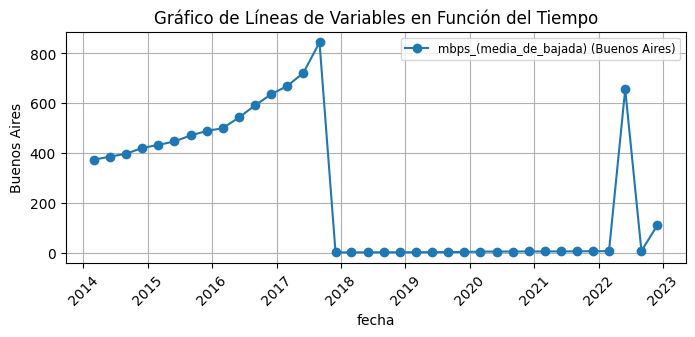

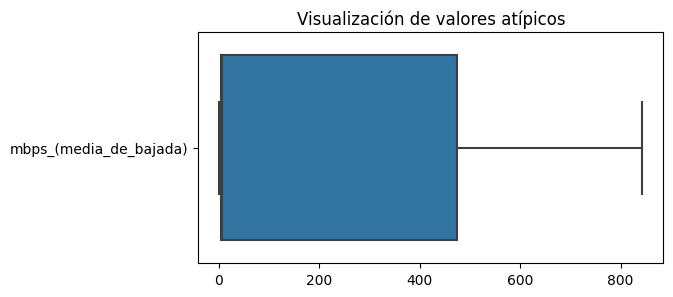

Para Buenos Aires se encontraron 0 valores outliers []


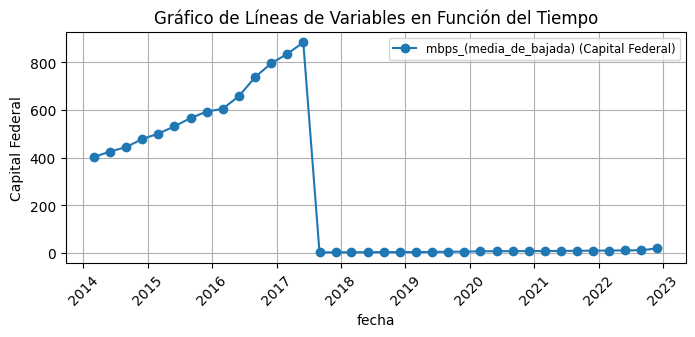

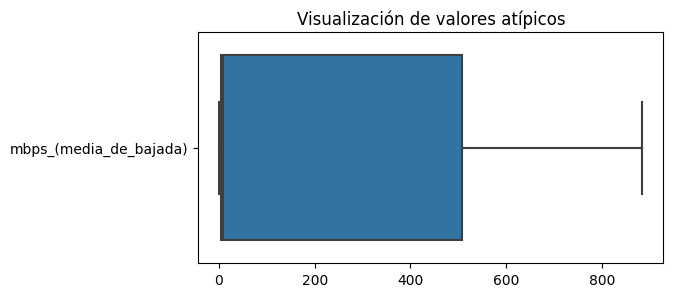

Para Capital Federal se encontraron 0 valores outliers []


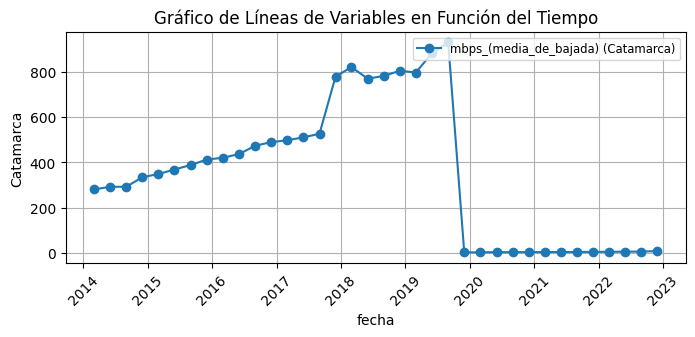

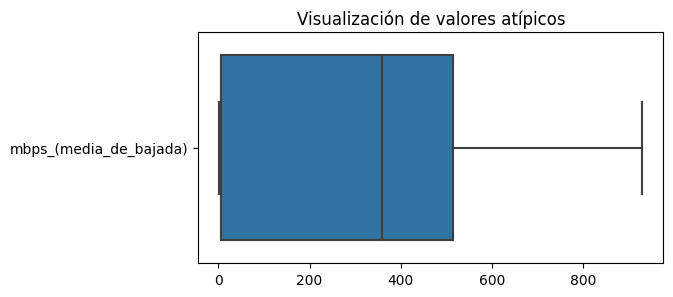

Para Catamarca se encontraron 0 valores outliers []


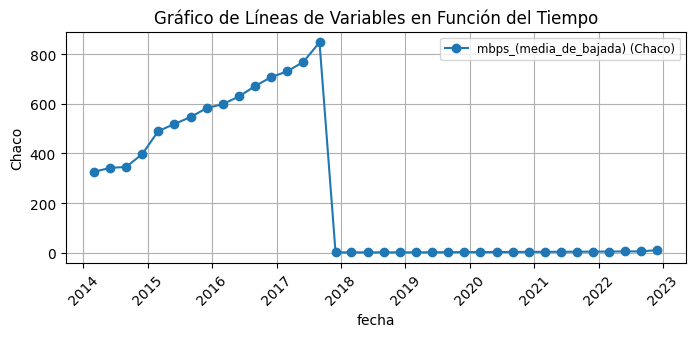

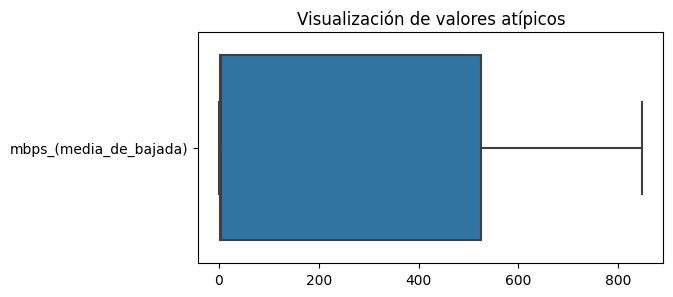

Para Chaco se encontraron 0 valores outliers []


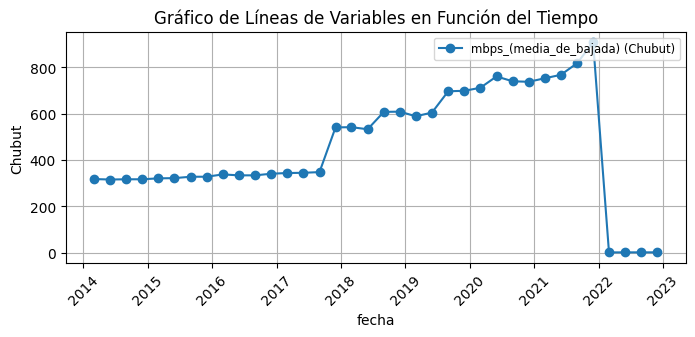

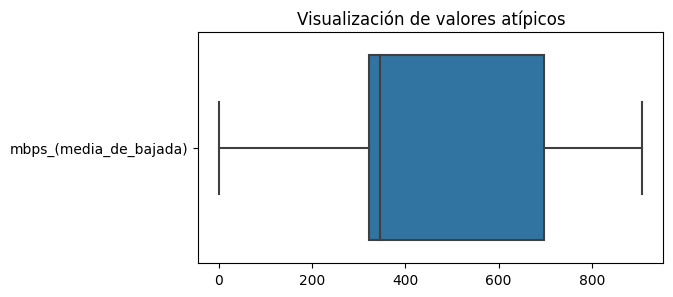

Para Chubut se encontraron 0 valores outliers []


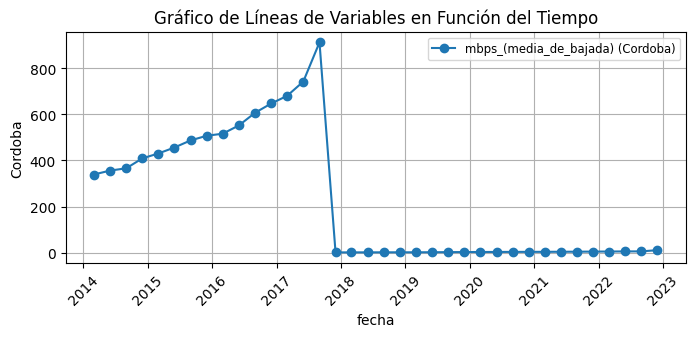

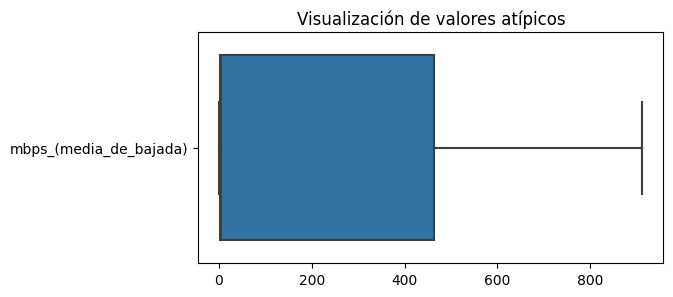

Para Cordoba se encontraron 0 valores outliers []


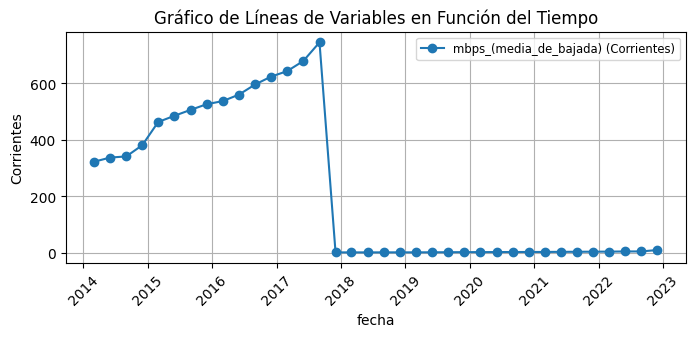

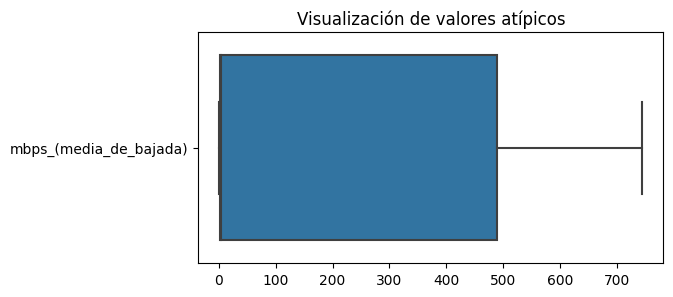

Para Corrientes se encontraron 0 valores outliers []


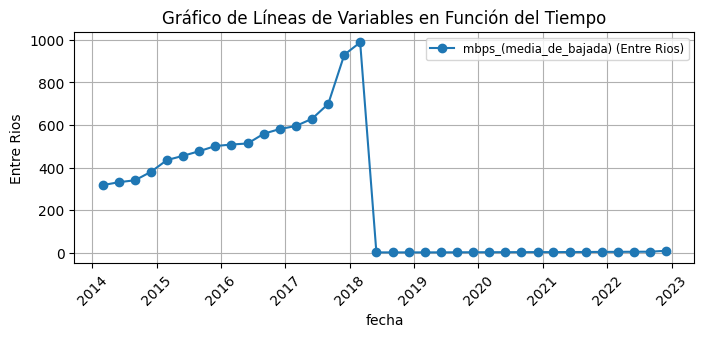

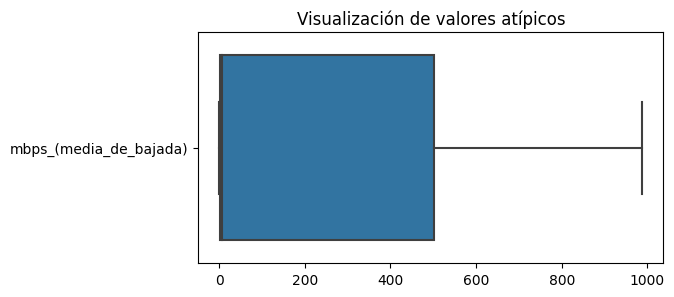

Para Entre Rios se encontraron 0 valores outliers []


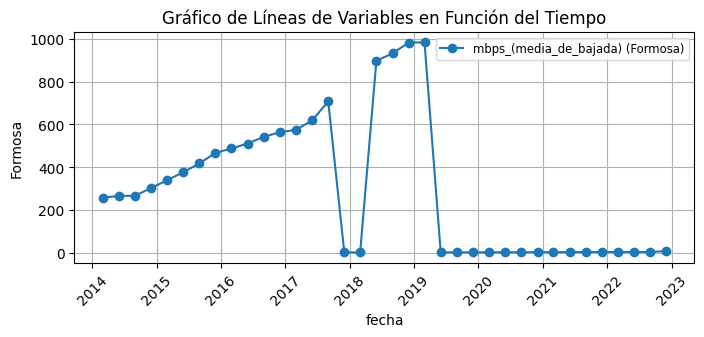

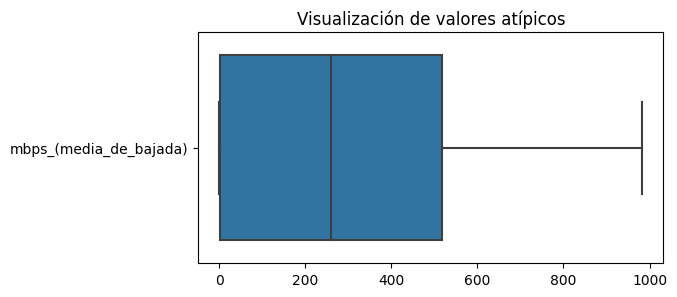

Para Formosa se encontraron 0 valores outliers []


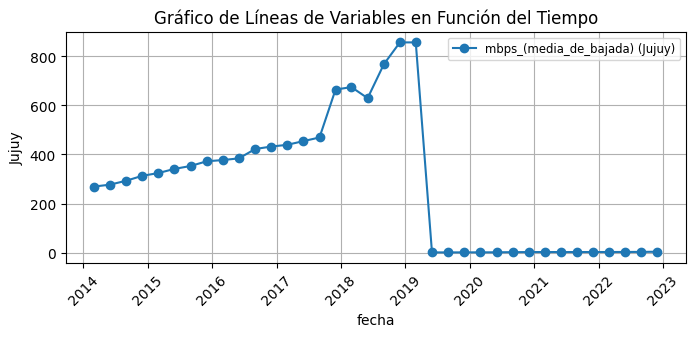

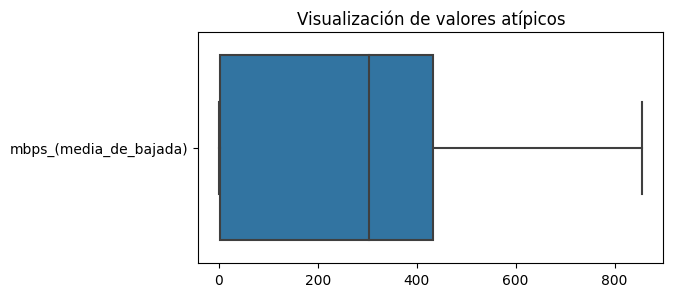

Para Jujuy se encontraron 0 valores outliers []


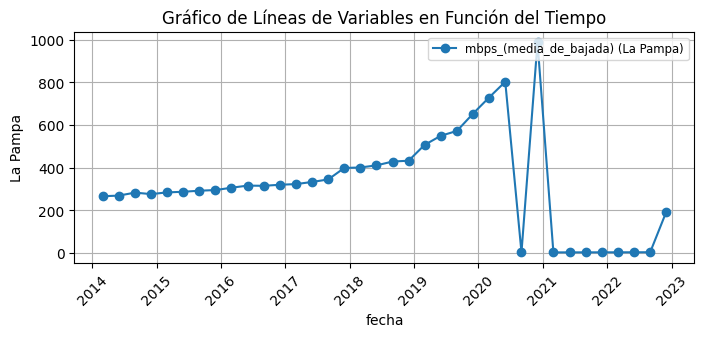

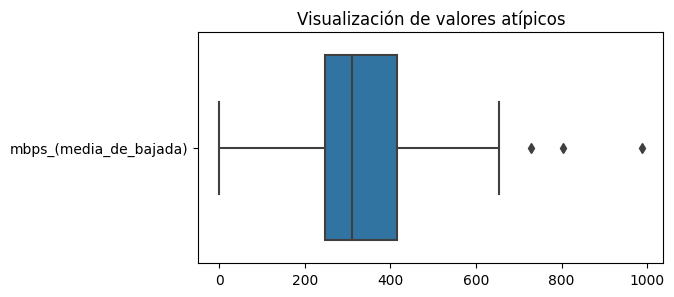

Para La Pampa se encontraron 0 valores outliers []


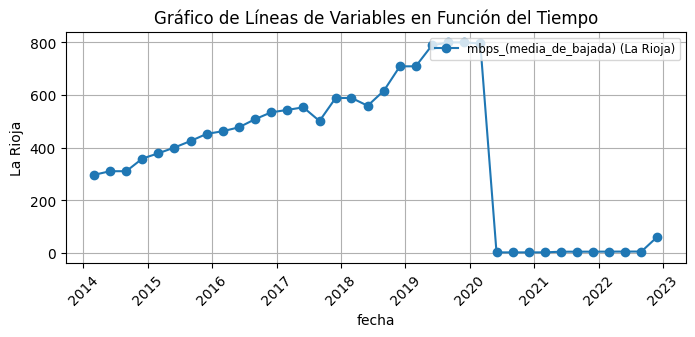

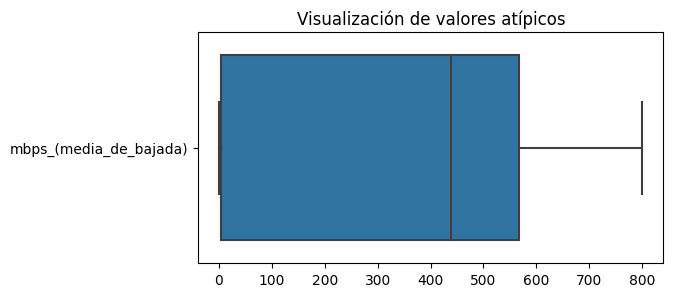

Para La Rioja se encontraron 0 valores outliers []


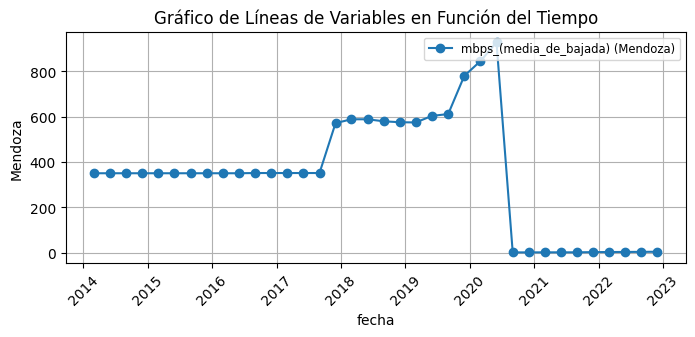

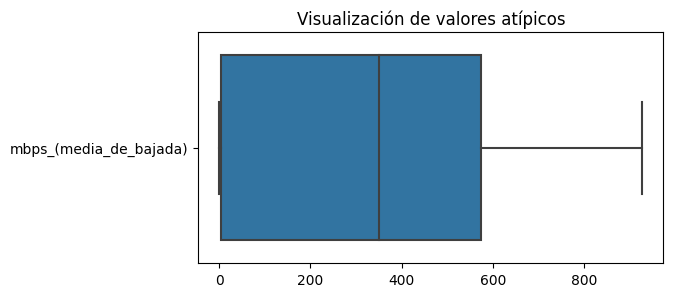

Para Mendoza se encontraron 0 valores outliers []


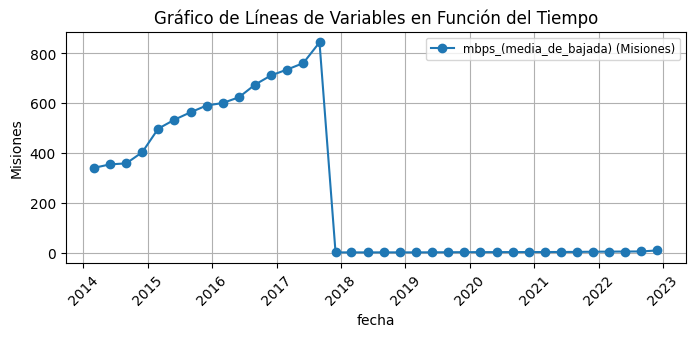

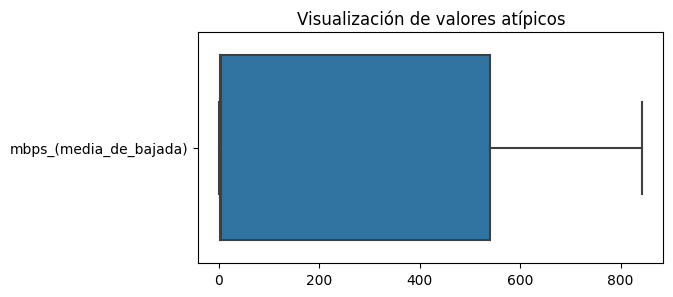

Para Misiones se encontraron 0 valores outliers []


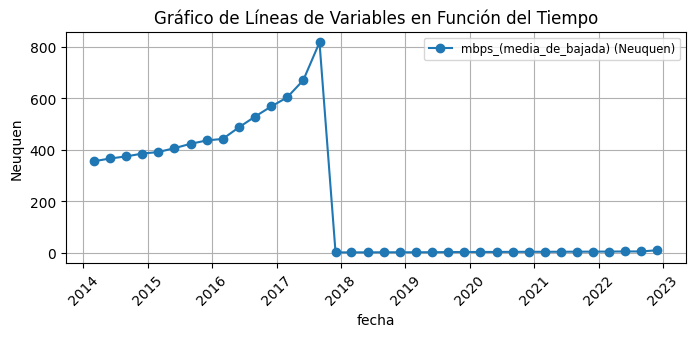

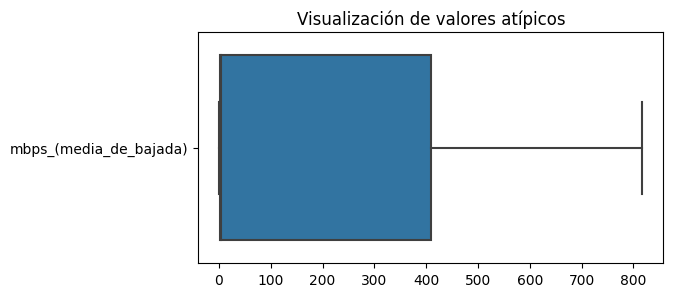

Para Neuquen se encontraron 0 valores outliers []


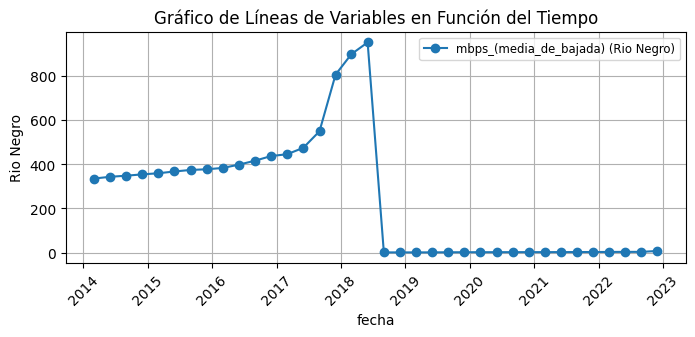

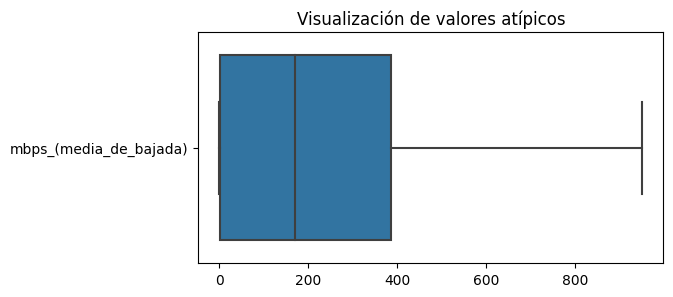

Para Rio Negro se encontraron 0 valores outliers []


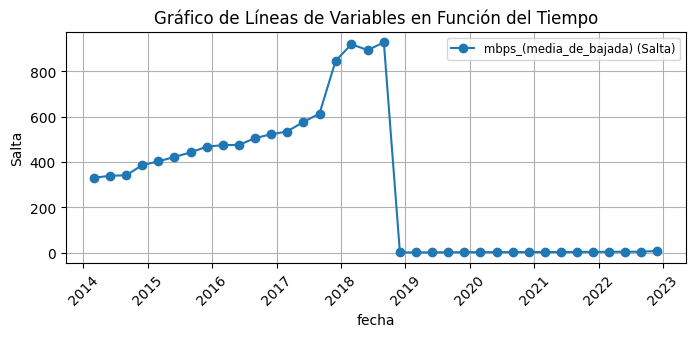

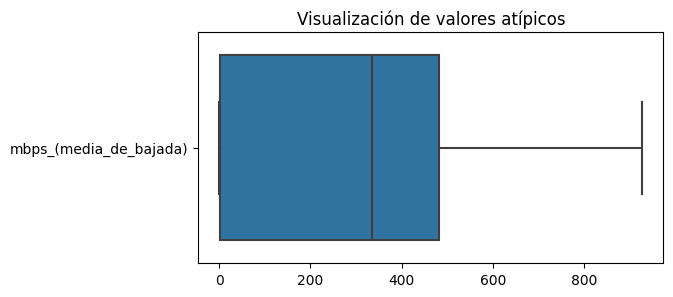

Para Salta se encontraron 0 valores outliers []


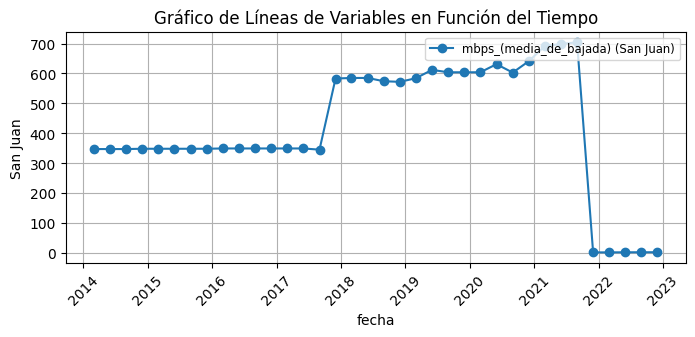

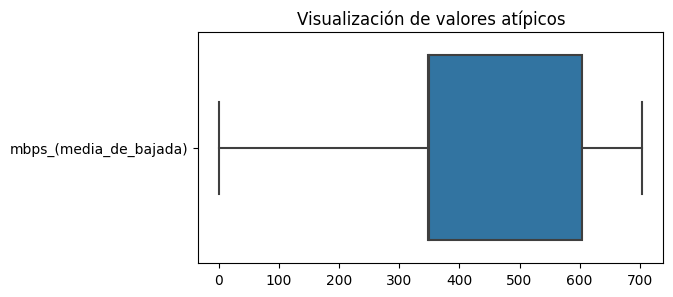

Para San Juan se encontraron 0 valores outliers []


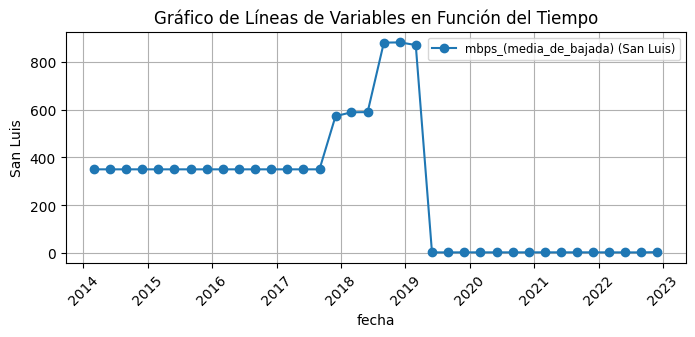

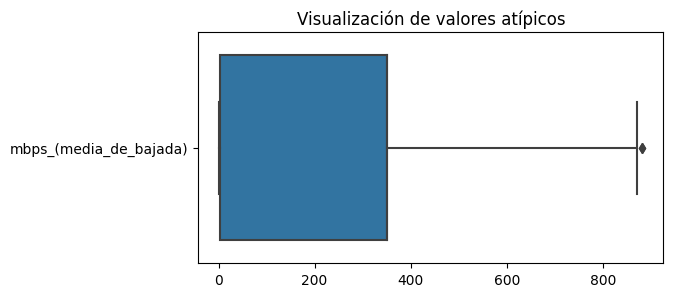

Para San Luis se encontraron 0 valores outliers []


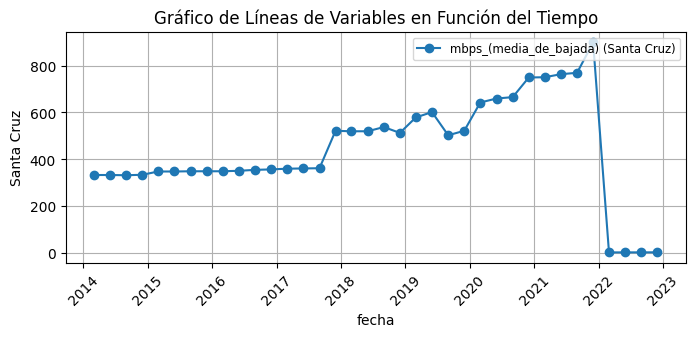

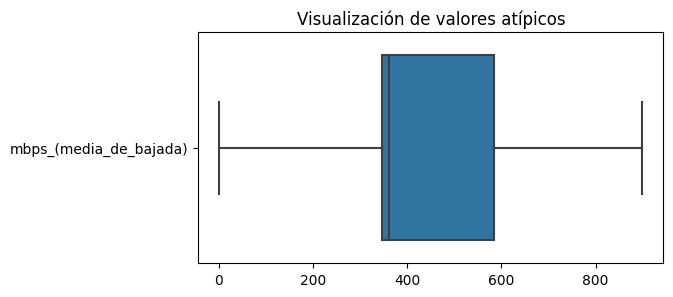

Para Santa Cruz se encontraron 0 valores outliers []


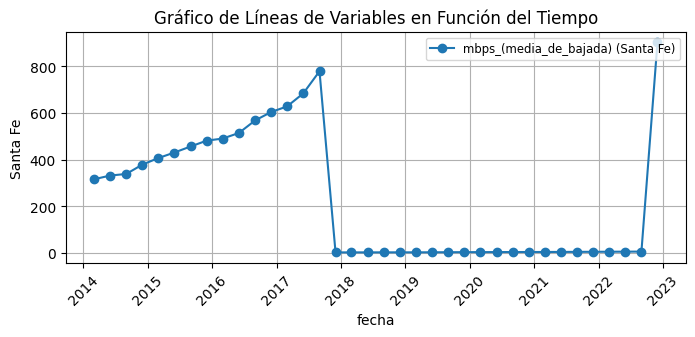

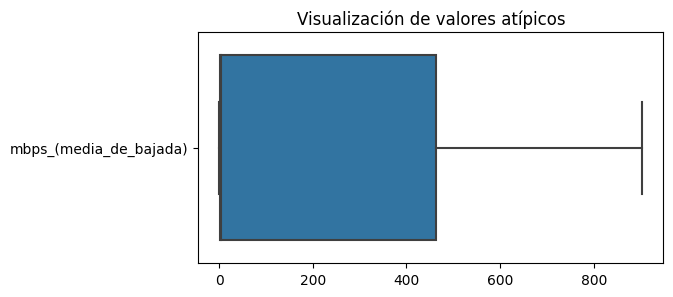

Para Santa Fe se encontraron 0 valores outliers []


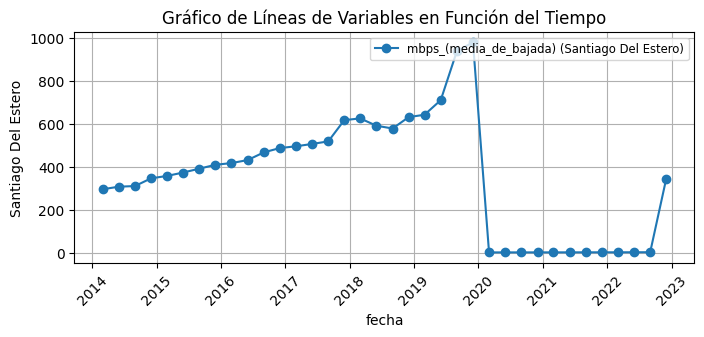

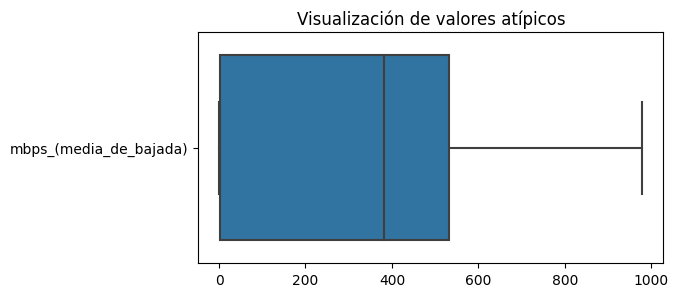

Para Santiago Del Estero se encontraron 0 valores outliers []


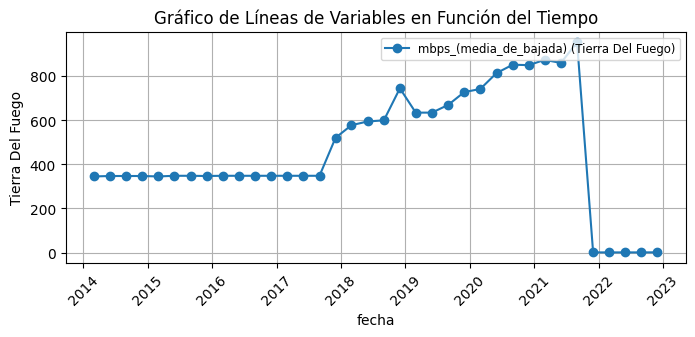

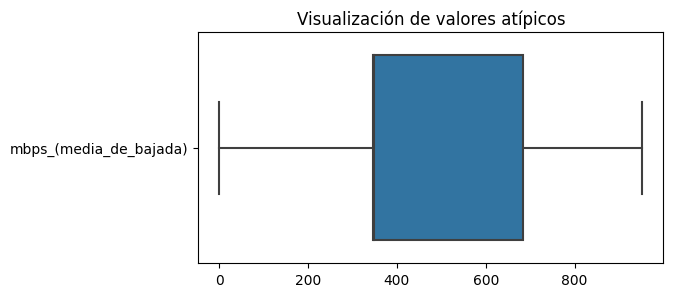

Para Tierra Del Fuego se encontraron 0 valores outliers []


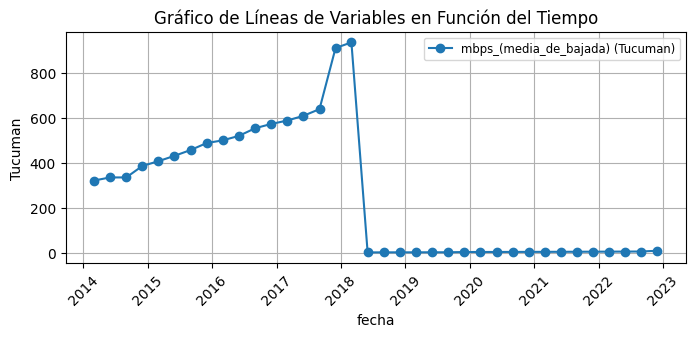

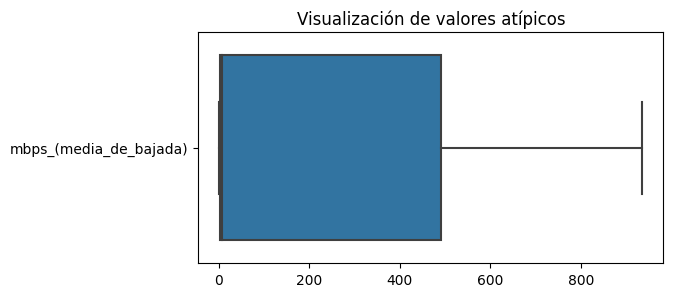

Para Tucuman se encontraron 0 valores outliers []


In [22]:
graficar_columnas_en_funcion_del_tiempo(df, valor_columna, a_evaluar)

***Grabamos el archivo***

In [23]:
df.to_csv('../csvPi/8_2_historico_velocidad_internet_provincias.csv', index=False)